In [1]:
import contract_utilities.expiration as exp
date_list = exp.get_bus_day_list(date_from=20121231, date_to=20180131)
date_list.reverse()
date_list

[20180131,
 20180130,
 20180129,
 20180126,
 20180125,
 20180124,
 20180123,
 20180122,
 20180119,
 20180118,
 20180117,
 20180116,
 20180112,
 20180111,
 20180110,
 20180109,
 20180108,
 20180105,
 20180104,
 20180103,
 20180102,
 20171229,
 20171228,
 20171227,
 20171226,
 20171222,
 20171221,
 20171220,
 20171219,
 20171218,
 20171215,
 20171214,
 20171213,
 20171212,
 20171211,
 20171208,
 20171207,
 20171206,
 20171205,
 20171204,
 20171201,
 20171130,
 20171129,
 20171128,
 20171127,
 20171124,
 20171122,
 20171121,
 20171120,
 20171117,
 20171116,
 20171115,
 20171114,
 20171113,
 20171110,
 20171109,
 20171108,
 20171107,
 20171106,
 20171103,
 20171102,
 20171101,
 20171031,
 20171030,
 20171027,
 20171026,
 20171025,
 20171024,
 20171023,
 20171020,
 20171019,
 20171018,
 20171017,
 20171016,
 20171013,
 20171012,
 20171011,
 20171010,
 20171009,
 20171006,
 20171005,
 20171004,
 20171003,
 20171002,
 20170929,
 20170928,
 20170927,
 20170926,
 20170925,
 20170922,
 20170921,

In [2]:
import backtesting.backtest_itf as itf
trades_frame_list = []

for i in range(len(date_list)):
    print(date_list[i])
    result_output = itf.get_results_4date(date_to=date_list[i])
    trades_frame_list.append(result_output['trades_frame'])


C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


20180131
20180130
20180129
20180126
20180125
20180124
20180123
20180122
20180119
20180118
20180117
20180116
20180112
20180111
20180110
20180109
20180108
20180105
20180104
20180103
20180102
20171229
20171228
20171227
20171226
20171222
20171221
20171220
20171219
20171218
20171215
20171214
20171213
20171212
20171211
20171208
20171207
20171206
20171205
20171204
20171201
20171130
20171129
20171128
20171127
20171124
20171122
20171121
20171120
20171117
20171116
20171115
20171114
20171113
20171110
20171109
20171108
20171107
20171106
20171103
20171102
20171101
20171031
20171030
20171027
20171026
20171025
20171024
20171023
20171020
20171019
20171018
20171017
20171016
20171013
20171012
20171011
20171010
20171009
20171006
20171005
20171004
20171003
20171002
20170929
20170928
20170927
20170926
20170925
20170922
20170921
20170920
20170919
20170918
20170915
20170914
20170913
20170912
20170911
20170908
20170907
20170906
20170905
20170901
20170831
20170830
20170829
20170828
20170825
20170824
20170823
2

KeyboardInterrupt: 

In [3]:
import pandas as pd
trades_frame = pd.concat(trades_frame_list)


In [28]:
trades_frame.columns

Index(['direction', 'entry_price', 'exit_price', 'entry_index', 'exit_index',
       'entry_hour_minute', 'target_price', 'ewma300DN', 'trend_age',
       'bullishWCumsum', 'bearishWCumsum', 'pnl', 'pnl_dollar', 'stop_loss',
       'daily_sd', 'normalized_stop_loss', 'pnl_normalized', 'ticker_head',
       'ticker', 'trend1', 'trend2', 'trade_date'],
      dtype='object')

In [48]:
# Filtering Based On Stop Loss Seem to Improve The Results

ticker_head_list = ['HO','LC','FC','NQ']
#ticker_head_list = ['NQ']
trades_frame = pd.concat(trades_frame_list)
trades_frame = trades_frame[trades_frame['trade_date']>=20170103]
trades_frame = trades_frame[trades_frame['ticker_head'].isin(ticker_head_list)]
selected_frame = trades_frame[trades_frame['normalized_stop_loss']>0.5]
print(selected_frame['pnl_normalized'].mean())
print(selected_frame['pnl_normalized'].sum())

selected_frame = trades_frame[trades_frame['normalized_stop_loss']<0.5]
print(selected_frame['pnl_normalized'].mean())
print(selected_frame['pnl_normalized'].sum())

-0.05553313218460023
-2.44345781612241
0.022466984925815774
25.657296785281613


In [102]:
# Filtering Based on Direction

# make sure the scaling are correct!

# RB

import pandas as pd
trades_frame = pd.concat(trades_frame_list)
ticker_head_list = trades_frame['ticker_head'].unique()

i=27
selected_frame = trades_frame[trades_frame['ticker_head']==ticker_head_list[i]]
print(ticker_head_list[i])

import matplotlib.pyplot as plt


plt.plot(range(len(selected_frame.index)),selected_frame['pnl_dollar'].cumsum())
plt.grid()         
         
plt.show()

IndexError: index 27 is out of bounds for axis 0 with size 27

In [34]:
# Filtering Based on ewma300DN
ticker_head_list = ['NQ']
trades_frame = trades_frame[trades_frame['trade_date']>=20170103]
trades_frame = trades_frame[trades_frame['ticker_head'].isin(ticker_head_list)]
long_frame = trades_frame[trades_frame['direction']>0]
long_frame

selected_frame = long_frame[long_frame['ewma300DN']<0.2]
print(selected_frame['pnl_normalized'].mean())
print(selected_frame['pnl_normalized'].sum())
print(len(selected_frame.index))
selected_frame = long_frame[long_frame['ewma300DN']>0.2]
print(selected_frame['pnl_normalized'].mean())
print(selected_frame['pnl_normalized'].sum())
print(len(selected_frame.index))

0.03598487335942679
7.196974671885357
200
0.06201881706928661
1.6124892438014518
26


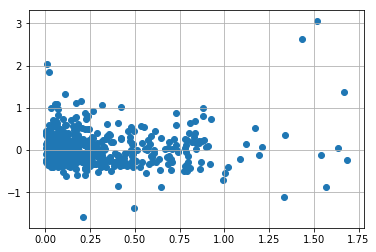

In [52]:


import matplotlib.pyplot as plt


plt.scatter(long_frame['ewma300DN'],long_frame['pnl_normalized'])
plt.grid()         
         
plt.show()

In [21]:
ticker_head_list = [ticker_head_list[i]]

In [22]:
ticker_head_list

['BP']

In [38]:
# Average Pnl Per TickerHead

trades_frame = pd.concat(trades_frame_list)
ticker_head_list = trades_frame['ticker_head'].unique()
long_pnl_list = []
short_pnl_list = []

for i in range(len(ticker_head_list)):
    selected_frame = trades_frame[trades_frame['ticker_head']==ticker_head_list[i]]
    long_frame = selected_frame[(selected_frame['direction']>0)&(selected_frame['trend2']>0)]
    short_frame = selected_frame[(selected_frame['direction']<0)&(selected_frame['trend2']<0)]
    long_pnl_list.append(long_frame['pnl_dollar'].mean())
    short_pnl_list.append(short_frame['pnl_dollar'].mean())
    
daily_frame = pd.DataFrame.from_items([('ticker_head', ticker_head_list),
                                            ('long_pnl',long_pnl_list),
                                            ('short_pnl',short_pnl_list)])  

daily_frame

,ticker_head,long_pnl,short_pnl
0,BO,-10.530808,-17.180477
1,BP,-13.819823,-27.196374
2,C,-36.817939,-25.004037
3,CD,-1.731317,-9.964352
4,CL,17.225878,-11.462249
5,EC,16.587236,-18.211829
6,ES,20.672724,-53.164436
7,FC,19.318056,-48.199771
8,GC,9.756699,-9.430268
9,HO,12.111558,-26.963125


In [24]:
import pandas as pd
trades_frame = pd.concat(trades_frame_list)
ticker_head_list = ['HO','LC','FC','NQ']
ticker_head_list = ['FC', 'NQ']
ticker_head_list = trades_frame['ticker_head'].unique()
i=1
ticker_head_list = [ticker_head_list[i]]
print(ticker_head_list[0])
trades_frame = trades_frame[trades_frame['ticker_head'].isin(ticker_head_list)]
trades_frame = trades_frame[trades_frame['normalized_stop_loss']<0.5]
trade_date_list = list(trades_frame['trade_date'].unique())
trade_date_list.reverse()
trade_date_list
long_pnl_list = []
short_pnl_list = []

for i in range(len(trade_date_list)):
    
    daily_frame = trades_frame[trades_frame['trade_date']==trade_date_list[i]]
    long_frame = daily_frame[daily_frame['direction']>0]
    short_frame = daily_frame[daily_frame['direction']<0]
    
    if len(long_frame.index)==0:
        long_pnl_list.append(0)
    else:
        long_pnl_list.append(long_frame['pnl_dollar'].sum())
    
    if len(short_frame.index)==0:
        short_pnl_list.append(0)
    else:
        short_pnl_list.append(short_frame['pnl_dollar'].sum())
        
        
daily_frame = pd.DataFrame.from_items([('trade_date', trade_date_list),
                                            ('long_pnl',long_pnl_list),
                                            ('short_pnl',short_pnl_list)])    
    
daily_frame['total_pnl'] =     daily_frame['long_pnl'] + daily_frame['short_pnl']
print(16*daily_frame['long_pnl'].mean()/ daily_frame['long_pnl'].std())
print(16*daily_frame['short_pnl'].mean()/ daily_frame['short_pnl'].std())
print(16*daily_frame['total_pnl'].mean()/ daily_frame['total_pnl'].std())

BP
-2.4283899421063513
-2.562182470251721
-3.5948739960990808


In [31]:
trades_frame = pd.concat(trades_frame_list)
long_frame = trades_frame[(trades_frame['direction']>0)&(trades_frame['ticker_head']=='HO')]
long_frame['pnl_dollar'].mean()

8.193124999991687

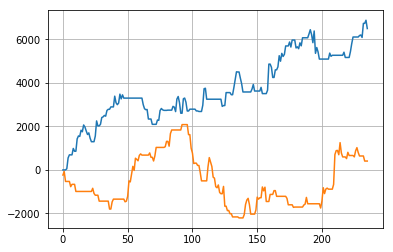

In [11]:
import matplotlib.pyplot as plt


plt.plot(range(len(daily_frame.index)),daily_frame['long_pnl'].cumsum(),
         range(len(daily_frame.index)),daily_frame['short_pnl'].cumsum())
plt.grid()         
         
plt.show()

In [76]:
trades_frame = pd.concat(trades_frame_list)
selected_frame = trades_frame[(trades_frame['ticker_head']=='LC')&(trades_frame['trade_date']==20180112)]
selected_frame

,direction,entry_price,exit_price,entry_index,exit_index,entry_hour_minute,target_price,ewma300DN,trend_age,bullishWCumsum,...,pnl_dollar,stop_loss,daily_sd,normalized_stop_loss,pnl_normalized,ticker_head,ticker,trend1,trend2,trade_date
0,-1.0,118.93125,119.008929,21.0,23.0,1015.0,118.891071,-0.444249,271.0,34.0,...,-31.071429,0.040179,1.167527,0.034413,-0.066533,LC,LCJ2018,-1,1,20180112
1,-1.0,119.24250,118.923611,28.0,38.0,1050.0,119.101667,-0.402858,278.0,38.0,...,127.555556,0.140833,1.167527,0.120625,0.273132,LC,LCJ2018,-1,1,20180112


In [2]:
import backtesting.backtest_itf as itf
results_output = itf.get_results_4ticker(ticker='LCJ2018',date_to=20180112)
daily_frame = results_output['daily_frame']

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


118.96874999999999
118.94374999999998
119.28
119.255


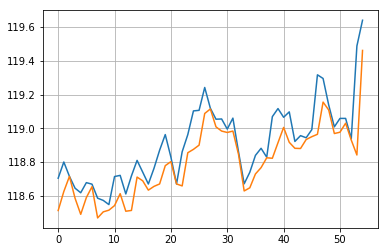

In [83]:


import matplotlib.pyplot as plt


plt.plot(range(len(daily_frame.index)),daily_frame['close'],
         range(len(daily_frame.index)),daily_frame['low'],)
plt.grid()         
         
plt.show()

In [86]:
daily_frame[['open','high','low','close','william']]

,open,high,low,close,william
0,118.987500,119.145000,118.512500,118.703947,-54.200016
1,118.703947,118.810714,118.625000,118.800000,-42.396313
2,118.800000,119.028571,118.715000,118.715000,-52.841782
3,118.710714,118.742857,118.585000,118.644737,-61.476271
4,118.642500,118.713462,118.490000,118.617857,-64.779460
5,118.617857,118.740000,118.589286,118.677778,-57.415941
6,118.675000,118.795000,118.653571,118.668750,-58.525346
7,118.618182,118.690000,118.468750,118.585714,-68.729427
8,118.532143,118.598529,118.504688,118.572500,-70.353303
9,118.572917,118.597727,118.514583,118.547727,-73.397570


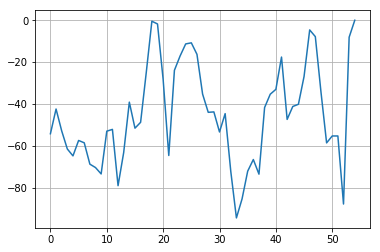

In [81]:
plt.plot(daily_frame['william'])
plt.grid()         
         
plt.show()

In [16]:
selected_frame = trades_frame[trades_frame['trend_age']<10]
print(selected_frame['pnl_normalized'].sum())
print(trades_frame['pnl_normalized'].sum())

1.102201300937045
23.063061206304432


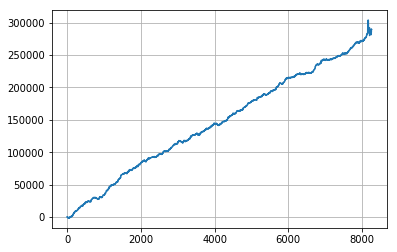

In [4]:
import matplotlib.pyplot as plt


plt.plot(range(len(trades_frame.index)),trades_frame['pnl_dollar'].cumsum())
plt.grid()         
         
plt.show()

In [5]:
grouped = trades_frame.groupby('trade_date').sum()
print(16*grouped['pnl_dollar'].mean()/grouped['pnl_dollar'].std())

selected_frame = trades_frame[trades_frame['normalized_stop_loss']<0.5]
grouped = selected_frame.groupby('trade_date').sum()
print(16*grouped['pnl_dollar'].mean()/grouped['pnl_dollar'].std())

13.371441001121717
13.649593988391315


In [24]:
import pandas as pd
import backtesting.utilities as bu
grouped = trades_frame.groupby('trade_date').sum()

pnl_frame = pd.DataFrame()
pnl_frame['pnl'] = grouped['pnl_dollar']
print(trades_frame['pnl_dollar'].sum())
print(trades_frame['pnl_dollar'].mean())
print(16*grouped['pnl_dollar'].mean()/grouped['pnl_dollar'].std())
print(bu.calculate_drawdown(data_frame_input=pnl_frame))

selected_frame = trades_frame[trades_frame['normalized_stop_loss']<0.5]
print(selected_frame['pnl_dollar'].sum())
print(selected_frame['pnl_dollar'].mean())
grouped = selected_frame.groupby('trade_date').sum()
print(16*grouped['pnl_dollar'].mean()/grouped['pnl_dollar'].std())
pnl_frame = pd.DataFrame()
pnl_frame['pnl'] = grouped['pnl_dollar']
bu.calculate_drawdown(data_frame_input=pnl_frame)

112822.05763984968
37.720514088883206
13.942740111586396
{'max_drawdown': 2873.8652501718752, 'mean_drawdown': 230.9296678570254}
110956.51626320032
38.16873624465095
14.192361763194857


{'max_drawdown': 2859.5158466234425, 'mean_drawdown': 230.19818354268847}

In [12]:
trades_frame.columns

Index(['direction', 'entry_price', 'exit_price', 'entry_index', 'exit_index',
       'target_price', 'pnl', 'pnl_dollar', 'stop_loss', 'daily_sd',
       'normalized_stop_loss', 'pnl_normalized', 'ticker_head', 'trade_date'],
      dtype='object')

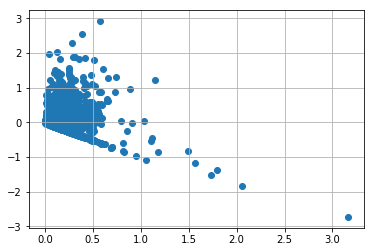

In [15]:
import matplotlib.pyplot as plt


plt.scatter(trades_frame['normalized_stop_loss'],trades_frame['pnl_normalized'])
plt.grid()         
         
plt.show()

In [19]:
selected_frame = trades_frame[trades_frame['normalized_stop_loss']>1]
print(selected_frame['pnl_normalized'].sum())

selected_frame = trades_frame[(trades_frame['normalized_stop_loss']>0.5)&(trades_frame['normalized_stop_loss']<1)]
print(selected_frame['pnl_normalized'].sum())

selected_frame = trades_frame[(trades_frame['normalized_stop_loss']<0.5)]
print(selected_frame['pnl_normalized'].sum())

-11.186525215378818
6.602388230899925
151.66387815404664


In [37]:
trades_frame['success'] = 0
trades_frame['success'].loc[trades_frame['pnl_dollar']>0]=1
selected_frame = trades_frame[trades_frame['pnl_normalized']>0]
selected_frame = trades_frame[trades_frame['direction']<0]
grouped = selected_frame.groupby('ticker_head').mean()
bearish_summary = grouped[['pnl_normalized','normalized_stop_loss','pnl_dollar','success','ewma300DN','trend_age','bullishWCumsum','bearishWCumsum']]

In [52]:
print(bearish_summary.iloc[11])
print(bullish_summary.iloc[11])

pnl_normalized            0.113533
normalized_stop_loss      0.066974
pnl_dollar               94.550159
success                   0.753846
ewma300DN                -0.120287
trend_age               267.753846
bullishWCumsum           42.338462
bearishWCumsum           55.230769
Name: GC, dtype: float64
pnl_normalized           -0.011857
normalized_stop_loss      0.162220
pnl_dollar               -9.866019
success                   0.410714
ewma300DN                 0.110520
trend_age               212.553571
bullishWCumsum           46.928571
bearishWCumsum           33.696429
Name: GC, dtype: float64


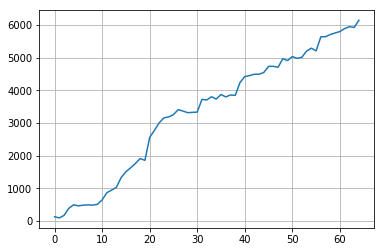

In [22]:
bullish_gold_trades = trades_frame[(trades_frame['ticker_head']=='GC')&(trades_frame['direction']>0)]
bearish_gold_trades = trades_frame[(trades_frame['ticker_head']=='GC')&(trades_frame['direction']<0)]

import matplotlib.pyplot as plt


plt.plot(range(len(bearish_gold_trades.index)),bearish_gold_trades['pnl_dollar'].cumsum())
plt.grid()         
         
plt.show()

In [25]:
bearish_gold_trades.sort_values('pnl_dollar')

,direction,entry_price,exit_price,entry_index,exit_index,target_price,ewma300DN,trend_age,bullishWCumsum,bearishWCumsum,pnl,pnl_dollar,stop_loss,daily_sd,normalized_stop_loss,pnl_normalized,ticker_head,trade_date
0,-1.0,1313.430000,1314.247959,103.0,108.0,1312.762041,-0.091448,571.0,84.0,115.0,-0.817959,-81.795918,0.667959,7.721138,0.086510,-0.105938,GC,20170919
2,-1.0,1272.085185,1272.819355,130.0,132.0,1271.501016,-0.058388,323.0,42.0,63.0,-0.734170,-73.416965,0.584170,8.781634,0.066522,-0.083603,GC,20171027
0,-1.0,1268.725714,1269.439412,105.0,108.0,1268.162017,-0.121110,298.0,37.0,61.0,-0.713697,-71.369748,0.563697,8.781634,0.064191,-0.081272,GC,20171027
0,-1.0,1304.137179,1304.714444,111.0,113.0,1303.709915,-0.133027,28.0,3.0,6.0,-0.577265,-57.726496,0.427265,8.526164,0.050112,-0.067705,GC,20170926
0,-1.0,1297.020968,1297.579630,111.0,118.0,1296.612306,-0.021775,169.0,30.0,48.0,-0.558662,-55.866189,0.408662,8.363604,0.048862,-0.066797,GC,20170925
0,-1.0,1282.815789,1283.346226,105.0,106.0,1282.435353,-0.230202,295.0,35.0,65.0,-0.530437,-53.043694,0.380437,8.629548,0.044085,-0.061468,GC,20171130
1,-1.0,1278.929808,1279.434286,116.0,120.0,1278.575330,-0.019890,354.0,70.0,49.0,-0.504478,-50.447802,0.354478,8.584339,0.041294,-0.058767,GC,20171113
0,-1.0,1278.726190,1279.146053,103.0,114.0,1278.456328,-0.020932,341.0,69.0,48.0,-0.419862,-41.986216,0.269862,8.584339,0.031437,-0.048910,GC,20171113
1,-1.0,1352.252041,1352.613636,128.0,133.0,1351.507530,-0.074840,37.0,7.0,4.0,-0.361596,-36.159555,0.744511,7.237748,0.102865,-0.049960,GC,20180126
0,-1.0,1334.726190,1335.047561,112.0,117.0,1334.363492,-0.037890,24.0,2.0,7.0,-0.321370,-32.137050,0.362698,7.972666,0.045493,-0.040309,GC,20180116


In [33]:
import get_price.get_futures_price as gfp
data_frame = gfp.get_futures_price_preloaded(ticker_head='GC', settle_date=20170919)
data_frame[['ticker','volume']]

,ticker,volume
161683,GCU2017,20.0
162145,GCV2017,4770.0
162182,GCX2017,335.0
163673,GCZ2017,268561.0
163938,GCG2018,1061.0
164172,GCJ2018,329.0
165271,GCM2018,192.0
165384,GCQ2018,107.0


In [34]:
import backtesting.backtest_itf as itf
results_output = itf.get_results_4ticker(ticker='GCZ2017',date_to=20170919)
daily_frame = results_output['daily_frame']
trades_frame = results_output['trades_frame']
trades_frame

,direction,entry_price,exit_price,entry_index,exit_index,target_price,ewma300DN,trend_age,bullishWCumsum,bearishWCumsum,pnl,pnl_dollar,stop_loss,daily_sd,normalized_stop_loss,pnl_normalized,ticker_head,trade_date
0,-1,1313.43,1314.247959,103,108,1312.762041,-0.091448,571.0,84,115,-0.817959,-81.795918,0.667959,7.721138,0.08651,-0.105938,GC,20170919


In [6]:
daily_frame[['close','ma5','low']].iloc[121:130]

,close,ma5,low
121,1283.838333,1283.333908,1283.133333
122,1284.550000,1283.629463,1283.504348
123,1283.972464,1283.750623,1283.746667
124,1284.870690,1284.155806,1283.830986
125,1285.158065,1284.477910,1284.711364
126,1284.552174,1284.620678,1284.550000
127,1284.537313,1284.618141,1284.213043
128,1284.852727,1284.794194,1284.127273
129,1286.508000,1285.121656,1284.812727


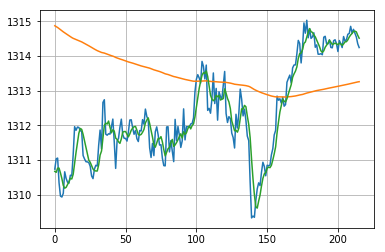

In [35]:
import matplotlib.pyplot as plt

plt.plot(daily_frame.index,daily_frame['close'],
         daily_frame.index,daily_frame['ewma300'],
         daily_frame.index,daily_frame['ma5'])
plt.grid()         
         
plt.show()

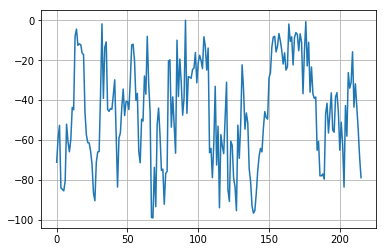

In [36]:
import matplotlib.pyplot as plt

plt.plot(daily_frame.index,daily_frame['william'])
plt.grid()         
         
plt.show()

In [80]:
0~=1

SyntaxError: invalid syntax (<ipython-input-80-bcd4754f7305>, line 1)

In [41]:
trades_frame = pd.concat(trades_frame_list)
selected_frame = trades_frame[(trades_frame['ticker_head']=='NQ')&(trades_frame['direction']>0)]
selected_frame.iloc[0]

direction                       1
entry_price                6980.1
exit_price                6969.73
entry_index                   110
exit_index                    117
entry_hour_minute             910
target_price               6990.1
ewma300DN               0.0863779
trend_age                     120
bullishWCumsum                 42
bearishWCumsum                 24
pnl                      -10.3739
pnl_dollar               -207.478
stop_loss                  9.9989
daily_sd                  42.4489
normalized_stop_loss     0.235552
pnl_normalized          -0.244386
ticker_head                    NQ
ticker                    NQH2018
trend1                          1
trend2                          1
trade_date               20180131
Name: 0, dtype: object

In [42]:
import backtesting.backtest_itf as itf
results_output = itf.get_results_4ticker(ticker='NQH2018',date_to=20180131)
daily_frame = results_output['daily_frame']

In [43]:
daily_frame

,open,high,low,close,buy_volume,sell_volume,volume,hour_minute,ewma300,ewma50,...,datetime,obs_no,bullishW,bearishW,ewma300DS,ewma300DSDiff,turning_points,trend_age,bullishWCumsum,bearishWCumsum
0,6945.150000,6949.166667,6943.416667,6948.027778,316.0,196.0,0.0,0,6957.337286,6956.221969,...,2018-01-31,5052,0,1,1.0,0.0,5041.0,11.0,0,10
1,6947.950000,6950.972222,6947.722222,6950.312500,105.0,86.0,0.0,5,6957.290609,6955.990226,...,2018-01-31,5053,0,0,1.0,0.0,5041.0,12.0,0,10
2,6951.000000,6951.357143,6946.416667,6947.625000,73.0,113.0,0.0,10,6957.226386,6955.662177,...,2018-01-31,5054,0,1,1.0,0.0,5041.0,13.0,0,11
3,6948.166667,6949.785714,6947.950000,6948.416667,86.0,49.0,0.0,15,6957.167850,6955.378040,...,2018-01-31,5055,0,0,1.0,0.0,5041.0,14.0,0,11
4,6948.333333,6949.250000,6946.100000,6948.166667,61.0,54.0,0.0,20,6957.108041,6955.095241,...,2018-01-31,5056,0,0,1.0,0.0,5041.0,15.0,0,11
5,6948.416667,6949.766667,6947.583333,6948.150000,72.0,60.0,0.0,25,6957.048519,6954.822878,...,2018-01-31,5057,0,0,1.0,0.0,5041.0,16.0,0,11
6,6948.150000,6951.527778,6948.050000,6951.527778,68.0,57.0,0.0,30,6957.011836,6954.693659,...,2018-01-31,5058,1,0,1.0,0.0,5041.0,17.0,1,11
7,6951.300000,6953.861111,6950.583333,6953.541667,93.0,97.0,0.0,35,6956.988779,6954.648483,...,2018-01-31,5059,1,0,1.0,0.0,5041.0,18.0,2,11
8,6953.863636,6956.437500,6952.642857,6955.833333,105.0,79.0,0.0,40,6956.981102,6954.694947,...,2018-01-31,5060,1,0,1.0,0.0,5041.0,19.0,3,11
9,6956.062500,6956.062500,6953.100000,6954.850000,41.0,72.0,0.0,45,6956.966941,6954.701028,...,2018-01-31,5061,1,0,1.0,0.0,5041.0,20.0,4,11


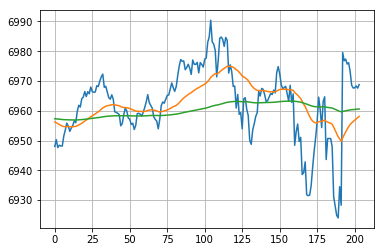

In [45]:
import matplotlib.pyplot as plt


plt.plot(range(len(daily_frame.index)),daily_frame['close'],
         range(len(daily_frame.index)),daily_frame['ewma50'],
         range(len(daily_frame.index)),daily_frame['ewma300'])
plt.grid()         
         
plt.show()

In [50]:
import get_price.quantgo_data as qd
candle_frame = qd.get_continuous_bar_data(ticker='NQH2018', date_to=20180131, num_days_back=5)

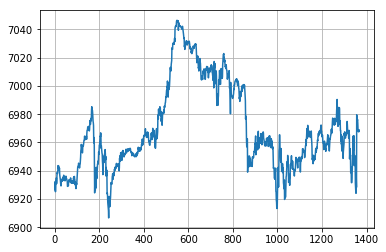

In [51]:
plt.plot(range(len(candle_frame.index)),candle_frame['close'])
plt.grid()         
         
plt.show()